In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

# Load the dataset
path = '/content/superstores.csv'
df = pd.read_csv(path)

# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)



In [13]:
# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(df['#Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing if not stationary
df_diff = df['#Passengers'].diff().dropna()



ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


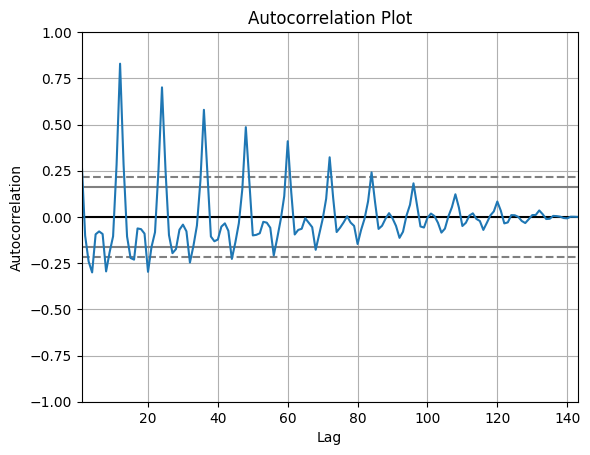

In [14]:

# ACF plot to check lags
autocorrelation_plot(df_diff)
plt.title("Autocorrelation Plot")
plt.show()


In [15]:

# Build ARIMA model (use (p,d,q) = (2,1,2) as an example)
model = ARIMA(df['#Passengers'], order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 14 Apr 2025   AIC                           1353.347
Time:                        14:41:38   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:

# Forecasting
forecast_steps = 12  # Forecasting next 12 months
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecasted values:")
print(forecast)


Forecasted values:
1961-01-01    439.854513
1961-02-01    465.296054
1961-03-01    500.665761
1961-04-01    535.971659
1961-05-01    561.690109
1961-06-01    571.314405
1961-07-01    562.974263
1961-08-01    539.731146
1961-09-01    508.529538
1961-10-01    478.147818
1961-11-01    456.746809
1961-12-01    449.695642
Freq: MS, Name: predicted_mean, dtype: float64


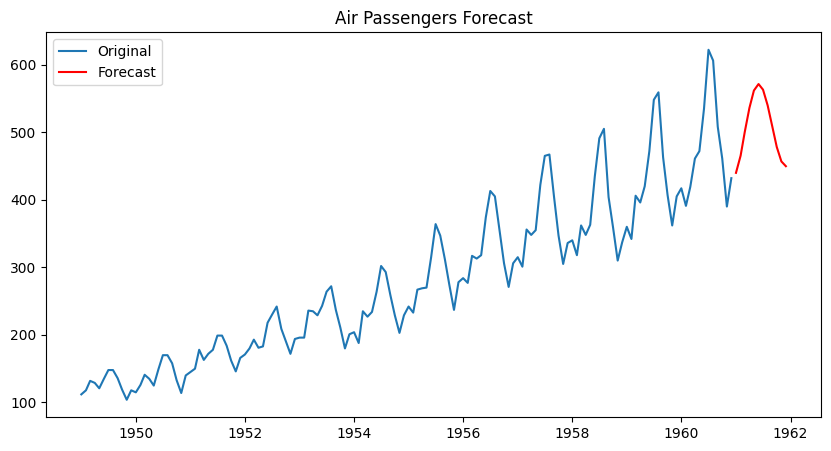

In [17]:

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Air Passengers Forecast')
plt.legend()
plt.show()
